# Background

In recent years, the home-sharing platform Airbnb has experienced exponential growth, reshaping the landscape of the hospitality industry worldwide. Tourists and travelers now have a diverse array of accommodations to choose from, ranging from entire homes and apartments to spare bedrooms and unique stays.

# Problem Statement
This proliferation of choices raises an intriguing question: What factors distinguish popular Airbnb listings from their less popular counterparts in a dynamic and culturally rich city like Bangkok?


In the context of Airbnb listings in Bangkok, Thailand, we aim to understand the factors that differentiate popular listings from less popular ones. To accomplish this, we must develop a robust methodology for classifying listings as "popular" or "not popular" and subsequently conduct a comprehensive analysis of their distinguishing characteristics. This analysis will address the following key questions:


1. What criteria define a listing as "popular"? We must establish a clear and empirically supported criterion for classifying listings, such as booking frequency, occupancy rates, or traveler reviews.

2. What are the distinguishing features of popular listings? Our analysis will focus on property types, pricing strategies, neighborhood preferences, and other attributes that contribute to a listing's popularity or lack thereof.

# Significance

This study provides valuable insights for multiple stakeholders, especially for Airbnb hosts. 
* For Airbnb hosts, understanding the attributes that influence a listing's popularity can inform pricing strategies and property management. 

* For travelers, this analysis can guide decisions when selecting accommodations that align with their preferences.

# Expected Outcomes

Our project anticipates revealing patterns and trends that distinguish popular listings from their less popular counterparts. These insights will contribute to an enriched understanding of the Airbnb market in Bangkok and provide actionable information for both hosts and guests.

By examining the specific characteristics that influence listing popularity, our project aims to illuminate the intricate dynamics of the Airbnb market in Bangkok and provide a valuable resource for all those engaged in the sharing economy.

# Data
To address the question above, we will analyze the data collected from Airbnb listings in Bangkok, Thailand. Dataset can be accessed [here](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF). 

In [511]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 14 kolom di dalam dataset hr_analytics, yaitu:  

* id: Airbnb's unique identifier for each listing.
* name: The name or title of the Airbnb listing, which may provide information about the property.
* host_id: Airbnb's unique identifier for the host or user who lists the property.
* host_name: The name of the host, typically the first name(s) of the host.
* neighborhood: The geocoded neighborhood, determined using latitude and longitude coordinates, based on public shapefiles.
* latitude: Latitude coordinates of the listing, using the World Geodetic System (WGS84) projection.
* longitude: Longitude coordinates of the listing, also using the World Geodetic System (WGS84) projection.
* room_type: The type of room available for booking, categorized as 'Entire home/apt,' 'Private room,' 'Shared room,' or 'Hotel.'
* price: The daily price of the listing in the local currency, sometimes using the $ sign, regardless of locale.
* minimum_nights: The minimum number of nights required for a stay, with possible variations based on calendar rules.
* number_of_reviews: The total number of reviews received by the listing.
* last_review: The date of the most recent review for the listing.
* calculated_host_listings_count: The count of listings by the host in the current scrape within the city/region geography.
* availability_365: A measure of listing availability for a certain number of days into the future, considering bookings and host blocks.
* number_of_reviews_ltm: The number of reviews received by the listing in the last 12 months.

The following are the top and bottom 5 rows from the Airbnb Listings Bangkok dataset.

In [512]:
df = pd.read_csv('Data\Airbnb Bangkok.csv')
df = df.drop('Unnamed: 0', axis=1)
display(df.head(),df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaN,NaN,3,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0


# Data Understanding and Cleaning

In [513]:
print(f'The number of rows and columns in the dataset are {df.shape}')
df.info()

The number of rows and columns in the dataset are (15854, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                    

In [514]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,10064.00,15854.00,15854.00,15854.00
mean,157939679701701248.00,154105783.58,13.75,100.56,3217.70,15.29,16.65,0.81,13.89,244.38,3.48
std,294601541771321664.00,131872648.11,0.04,0.05,24972.12,50.82,40.61,1.09,30.27,125.84,8.92
min,27934.00,58920.00,13.53,100.33,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,21045091.50,39744308.00,13.72,100.53,900.00,1.00,0.00,0.12,1.00,138.00,0.00
50%,35037340.00,122455569.00,13.74,100.56,1429.00,1.00,2.00,0.43,4.00,309.00,0.00
75%,52561542.25,239054687.50,13.76,100.59,2429.00,7.00,13.00,1.06,13.00,360.00,3.00
max,790816217344482048.00,492665929.00,13.95,100.92,1100000.00,1125.00,1224.00,19.13,228.00,365.00,325.00


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [515]:
# Unique values for each variable
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
1,name,14794,"[Nice room with superb city view, Easy going l..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1..."


In [516]:
duplicate = df[df.duplicated()]
print(duplicate)
print(df.isnull().sum())
condition = df['last_review'].isnull()

result = df[condition]['reviews_per_month'].isnull() & (df[condition]['number_of_reviews'] == 0)

if result.all():
    print("All rows with 'last_review' null have 'reviews_per_month' null and 'number_of_reviews' 0.")
elif result.any():
    print("Some rows with 'last_review' null have 'reviews_per_month' null and 'number_of_reviews' 0.")
else:
    print("No rows with 'last_review' null have 'reviews_per_month' null and 'number_of_reviews' 0.")

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64
All rows with 'last_review' null have 'reviews_per_month' null and 'number_of_reviews' 0.


From the descriptive statistics above, we can make a few observations:

* The dataset contains 15854 rows and 16 columns.
* The dataset contains zero duplicates.
* A few variables, which are `last_review`, `reviews_per_month`, `name`, and `host_name` contains missing values represented by NaN. For the variable `reviews_per_month`, we can change the missing values to 0 as we can assume that this is caused by the listing having 0 reviews. The missing values in the variable `name` won't be a problem for our analysis and can be left as is.
* The variables `id`, `host_id`, `host_name`, and `last_review` are irrelevant to the analysis and can be dropped.
* The variable `availability_365` is too ambiguous as we do not know whether the reason for the listing being unavailable is due to booking or host block. Therefore, the variable can also be dropped.
* The variable `minimum_nights` has a relatively wide range, with the minimum being 1 day, and the maximum being 3+ years. For the purpose of the analysis, we will categorize listings with a `minimum_nights` value of less than 28 days as 'Short-Term' and listings with a `minimum_nights` value of 28 days and above as 'Long-Term'. This threshold is obtained from the 'Strict Long Term' section of [this Airbnb article](https://www.airbnb.com/help/article/475).
* In the variable `price`, there is a listing with a price of 0, this will have to be dealt with. 
* The variable `price` also has a relatively wide range, with the maximum being 1,100,000. Although this value does not make sense (Assuming the currency is Thailand Baht), this outlier won't be a problem for our analysis, as we will be using non-parametric measures and tests for the variable price. Therefore, we won't be dealing with the outlier.

# Missing Values

In [517]:
df.drop(['id'], axis = 1, inplace =  True)
df.drop(['host_id'], axis = 1, inplace =  True)
df.drop(['host_name'], axis = 1, inplace =  True)
df.drop(['last_review'], axis = 1, inplace =  True)
df.drop(['availability_365'], axis = 1, inplace =  True)
df.fillna({'last_review': 0}, inplace = True)
df.fillna({'reviews_per_month': 0}, inplace = True)
print(df.isnull().sum())

name                              8
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
number_of_reviews_ltm             0
dtype: int64


In [518]:
shapiro_price = shapiro(df['price'])
print("Shapiro-Wilk test for 'price':")
print("Statistic:", shapiro_price[0])
print("p-value:", shapiro_price[1])

ks_statistic, p_value = kstest(df['price'], 'norm')
print("\nKS test for 'price':")
print("Statistic:", ks_statistic)
print("p-value:", p_value)

Shapiro-Wilk test for 'price':
Statistic: 0.0444185733795166
p-value: 0.0

KS test for 'price':
Statistic: 0.9999369244354737
p-value: 0.0


Since both Normality Test results in p-value < 0.05, therefore we can conclude that the variable price does not have a normal distribution.

Therefore, we will proceed using non-parametric measures and tests for price.

We will replace the price of listings with a value of 0 with the median price of the dataset.

In [519]:
median_price = df["price"].median()
df["price"].replace(0, median_price, inplace=True)

We will categorize the variable 'minimum_nights' into 'Short-Term' and 'Long-Term' based on the specified threshold.

In [520]:
df['minimum_stay'] = df['minimum_nights'].apply(lambda x: 'Short-Term' if x < 28 else 'Long-Term')
display(df.head())

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,minimum_stay
0,Nice room with superb city view,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,0.50,2,0,Short-Term
1,"Easy going landlord,easy place",Bang Na,13.67,100.62,Private room,1316,1,0,0.00,2,0,Short-Term
2,modern-style apartment in Bangkok,Bang Kapi,13.75,100.62,Private room,800,60,0,0.00,1,0,Long-Term
3,Spacious one bedroom at The Kris Condo Bldg. 3,Din Daeng,13.79,100.57,Private room,1286,7,2,0.03,1,1,Short-Term
4,Suite Room 3 at MetroPoint,Bang Kapi,13.77,100.63,Private room,1905,1,0,0.00,3,0,Short-Term


In [522]:
Q1 = df["reviews_per_month"].quantile(0.25)
Q3 = df["reviews_per_month"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["reviews_per_month"] < lower_bound) | (df["reviews_per_month"] > upper_bound)]

total_data_points = len(df)
total_outliers = len(outliers)
percentage_outliers = (total_outliers / total_data_points) * 100
print(percentage_outliers)

9.278415541819099


In [523]:
popular = df[df["reviews_per_month"] > upper_bound]

total_popular = len(popular)
percentage_popular = (total_popular / total_data_points) * 100
print(percentage_popular)

9.278415541819099


Since 'percentage_outliers' and 'percentage_popular' are both equal, we know that there are no outliers below the lower bound.

In [524]:
not_popular = df[df["reviews_per_month"] <= upper_bound]

df["popularity"] = "not_popular"
df.loc[df["reviews_per_month"] > upper_bound, "popularity"] = "popular"

# Final Dataset

In [555]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15854, 13)


,dataFeatures,dataType,null,unique,uniqueSample
0,name,object,8,14794,"[2 Bedroom Luxury Eastville CDC, Prime Locatio..."
1,neighbourhood,object,0,50,"[Bang Kapi, Thawi Watthana]"
2,latitude,float64,0,9606,"[13.77195, 13.80616]"
3,longitude,float64,0,10224,"[100.72867, 100.45817]"
4,room_type,object,0,4,"[Private room, Hotel room]"
5,price,int64,0,3039,"[2312, 3866]"
6,minimum_nights,int64,0,86,"[45, 4]"
7,number_of_reviews,int64,0,298,"[191, 61]"
8,reviews_per_month,float64,0,514,"[1.76, 1.69]"
9,calculated_host_listings_count,int64,0,50,"[25, 62]"


In [556]:
display(popular.describe(), popular.describe(include = 'object'))

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
count,1471.00,1471.00,1471.00,1471.00,1471.00,1471.00,1471.00,1471.00
mean,13.74,100.56,2202.15,4.97,76.96,2.83,22.39,17.43
std,0.03,0.04,1792.67,32.27,97.25,1.49,37.04,20.73
min,13.66,100.41,346.00,1.00,2.00,1.68,1.00,0.00
25%,13.72,100.54,1137.50,1.00,8.00,2.00,4.00,5.00
50%,13.74,100.56,1690.00,1.00,26.00,2.40,10.00,12.00
75%,13.75,100.57,2580.00,2.00,127.50,3.12,29.00,24.00
max,13.93,100.78,22536.00,1125.00,1224.00,19.13,228.00,325.00


,name,neighbourhood,room_type,minimum_stay
count,1471,1471,1471,1471
unique,1392,37,4,2
top,New! Gateway/ Bangkok University 1BR 2PPL near...,Khlong Toei,Entire home/apt,Short-Term
freq,15,381,1179,1391


In [557]:
display(not_popular.describe(), not_popular.describe(include = 'object'))

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
count,14383.00,14383.00,14383.00,14383.00,14383.00,14383.00,14383.00,14383.00
mean,13.75,100.56,3321.67,16.35,10.49,0.28,13.02,2.05
std,0.04,0.05,26209.63,52.23,21.01,0.41,29.35,4.67
min,13.53,100.33,278.00,1.00,0.00,0.00,1.00,0.00
25%,13.72,100.53,893.00,1.00,0.00,0.00,1.00,0.00
50%,13.74,100.56,1400.00,1.00,1.00,0.05,4.00,0.00
75%,13.76,100.59,2414.00,9.00,10.00,0.43,12.00,2.00
max,13.95,100.92,1100000.00,1115.00,212.00,1.67,228.00,56.00


,name,neighbourhood,room_type,minimum_stay
count,14375,14383,14383,14383
unique,13472,50,4,2
top,New! La Chada Night Market studio 2PPL near MRT,Vadhana,Entire home/apt,Short-Term
freq,45,1875,7733,11620


In [553]:
sorted_data = not_popular.sort_values(by="price", ascending=False)
display(sorted_data.head(), sorted_data.tail())

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,minimum_stay
12868,New 1 bedroom apartment BTS MRT Asoke,Vadhana,13.74,100.56,Entire home/apt,1100000,14,0,0.00,1,0,Short-Term
12300,3B中文No Guest Service Fee@Nana Asok/Soi11 Night...,Vadhana,13.75,100.56,Entire home/apt,1014758,30,2,0.32,10,2,Long-Term
9345,1BR cozy condo close to ONNUT BTS.,Khlong Toei,13.70,100.59,Entire home/apt,1000000,25,2,0.05,6,0,Short-Term
1239,"Modern,wifi,5m MRT&2 Shopping Mall",Huai Khwang,13.76,100.57,Entire home/apt,1000000,100,45,0.51,4,0,Long-Term
1779,"2 Bedroom,wifi,5mMRT&Shopping Mall",Huai Khwang,13.75,100.57,Entire home/apt,1000000,100,53,0.64,4,0,Long-Term


,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,minimum_stay
15473,Flourish Capsule Hostel,Bang Rak,13.73,100.53,Shared room,295,1,1,1.00,1,1,Short-Term
15455,1 Upper-Bunk Bed /w Shared Bath,Suanluang,13.71,100.61,Shared room,280,1,0,0.00,7,0,Short-Term
15456,1 Lower-Bunk Bed /w Shared Bath,Suanluang,13.71,100.61,Shared room,280,1,0,0.00,7,0,Short-Term
15401,Mixed Dorm 10 Bunkbed at Amazing khaosan Hostel 2,Phra Nakhon,13.76,100.50,Shared room,280,1,0,0.00,12,0,Short-Term
15551,Artist Private AirRoom 10min2SkytrainPetFriendly,Phasi Charoen,13.70,100.43,Private room,278,1,0,0.00,2,0,Short-Term


From the descriptive statistics, we can observe that popular listings have greater than 1.67 'reviews_per_month'.

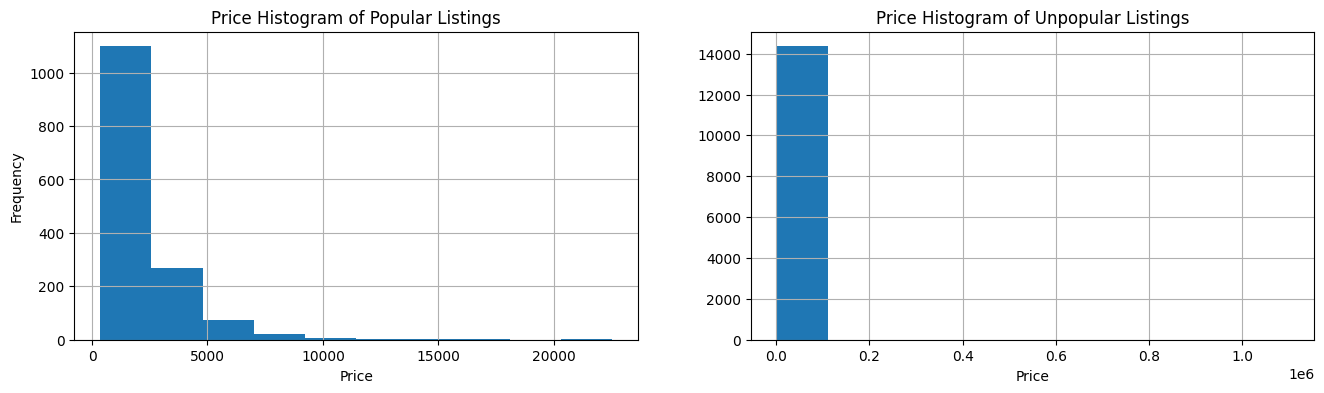

In [550]:
plt.figure(figsize = (16, 4))

plt.subplot(121)
popular['price'].hist()
plt.title('Price Histogram of Popular Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(122)
not_popular['price'].hist()
plt.title('Price Histogram of Unpopular Listings')
plt.xlabel('Price')

plt.show()

From the Histograms, we can observe that the variable price is not normally distributed for both 'popular' and 'not_popular' datasets.

In [530]:
median_price = popular["price"].median()
iqr_price = popular["price"].quantile(0.75) - popular["price"].quantile(0.25)

print(f"Median Price in Popular Dataset: {median_price:.2f}")
print(f"IQR of Price in Popular Dataset: {iqr_price:.2f}")

Median Price in Popular Dataset: 1690.00
IQR of Price in Popular Dataset: 1442.50


In [531]:
median_price = not_popular["price"].median()
iqr_price = not_popular["price"].quantile(0.75) - not_popular["price"].quantile(0.25)

print(f"Median Price in Unpopular Dataset: {median_price:.2f}")
print(f"IQR of Price in Unpopular Dataset: {iqr_price:.2f}")

Median Price in Unpopular Dataset: 1400.00
IQR of Price in Unpopular Dataset: 1521.00


In [532]:
statistic, p_value = mannwhitneyu(popular["price"], not_popular["price"], alternative="greater")

print(f"Mann-Whitney U Statistic: {statistic:.2f}")
print(f"P-Value: {(p_value/2):.4f}")

alpha = 0.05 
if p_value/2 < alpha:
    print("Reject the null hypothesis: We can conclude that the median in the 'popular' dataset is significantly greater.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence to conclude that the median in the 'popular' group is greater.")

Mann-Whitney U Statistic: 12198267.50
P-Value: 0.0000
Reject the null hypothesis: We can conclude that the median in the 'popular' dataset is significantly greater.


From the test results, we conclude that the median price of popular listings is significantly higher than that of unpopular listings. 

This suggests that Airbnb renters in Bangkok, primarily tourists, prioritize comfort and are willing to choose relatively higher-priced listings for a more comfortable experience.

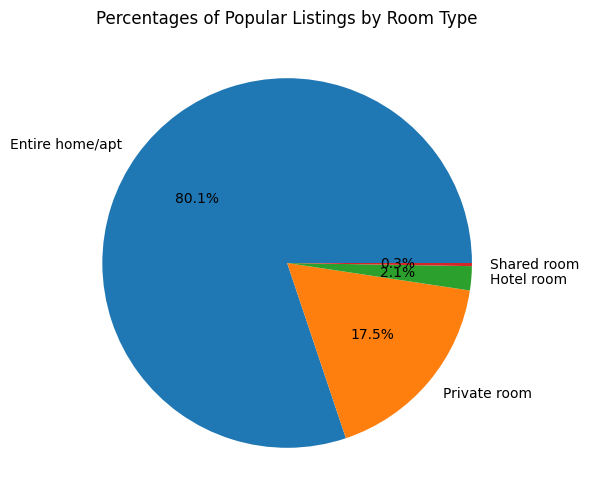

In [533]:
roomtype_count = popular['room_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(roomtype_count, labels=roomtype_count.index, autopct='%1.1f%%')
plt.title("Percentages of Popular Listings by Room Type")
plt.show()

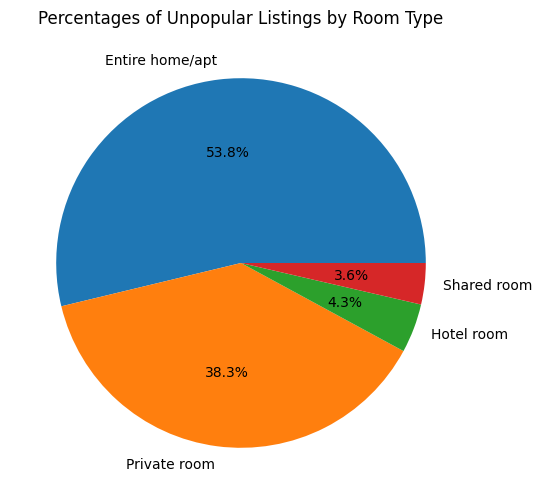

In [534]:
roomtype_count = not_popular['room_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(roomtype_count, labels=roomtype_count.index, autopct='%1.1f%%')
plt.title("Percentages of Unpopular Listings by Room Type")
plt.show()

In [535]:
popular_room_type = popular['room_type']
not_popular_room_type = not_popular['room_type']

popular_entire_home_proportion = (popular_room_type == 'Entire home/apt').mean()
not_popular_entire_home_proportion = (not_popular_room_type == 'Entire home/apt').mean()

count = [popular_entire_home_proportion, not_popular_entire_home_proportion]
nobs = [len(popular), len(not_popular)]

z_stat, p_value = proportions_ztest(count, nobs, alternative="larger")

print(p_value/2)

alpha = 0.05

if p_value/2 < alpha:
    print("The proportion of 'Entire home/apt' listings in the 'popular' dataset is greater than the 'not_popular' dataset.")
else:
    print("There is no significant evidence that the proportion of 'Entire home/apt' listings in the 'popular' dataset is greater.")

0.010917596211600017
The proportion of 'Entire home/apt' listings in the 'popular' dataset is greater than the 'not_popular' dataset.


Based on the result of the proportions Z-test, it is evident that popular listings have a significantly higher proportion of 'Entire home/apartment' accommodations compared to unpopular listings. 

This finding may be attributed to the preference among tourists for greater privacy and the desire to have an entire place to themselves during their stay.

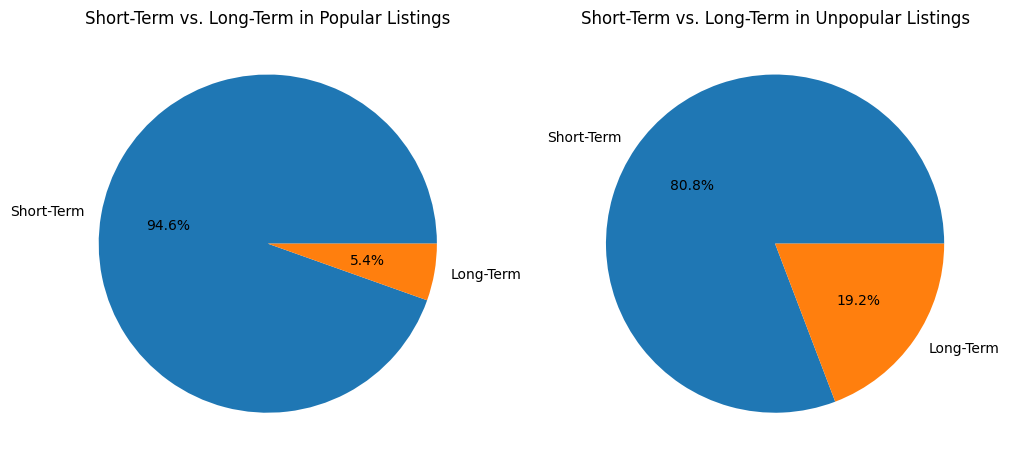

In [536]:
stay_popular = popular['minimum_stay'].value_counts()
stay_notpopular = not_popular['minimum_stay'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.pie(stay_popular, labels=stay_popular.index, autopct='%1.1f%%')
plt.title("Short-Term vs. Long-Term in Popular Listings")

plt.subplot(122)
plt.pie(stay_notpopular, labels=stay_notpopular.index, autopct='%1.1f%%')
plt.title("Short-Term vs. Long-Term in Unpopular Listings")
plt.show()

In [537]:
popular_stay = popular['minimum_stay']
not_popular_stay = not_popular['minimum_stay']

popular_short_term_proportion = (popular_stay == 'Short-Term').mean()
not_popular_short_term_proportion = (not_popular_stay == 'Short-Term').mean()

count = [popular_short_term_proportion, not_popular_short_term_proportion]
nobs = [len(popular), len(not_popular)]

z_stat, p_value = proportions_ztest(count, nobs, alternative="larger")

print(p_value/2)

alpha = 0.05

if p_value/2 < alpha:
    print("The proportion of 'Short-Term' listings in the 'popular' dataset is greater than the 'not_popular' dataset.")
else:
    print("There is no significant evidence that the proportion of 'Short-Term' listings in the 'popular' dataset is greater.")

0.010388800826653756
The proportion of 'Short-Term' listings in the 'popular' dataset is greater than the 'not_popular' dataset.


Based on the result of the proportions Z-test, it is evident that popular listings have a significantly higher proportion of 'Short-Term' accommodations compared to unpopular listings. 

This may be attributed to the fact that most tourists prefer shorter stays, and a long-term minimum-stay requirement may not align with their preferences.

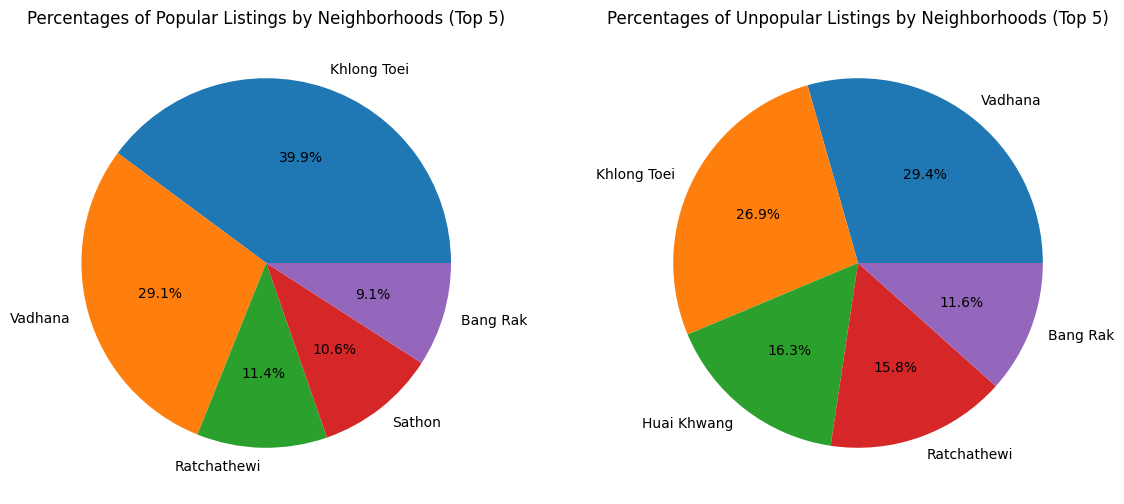

In [538]:
popular_neighbor_counts = popular['neighbourhood'].value_counts()
top_popular_neighborhoods = popular_neighbor_counts.head(5).index.tolist()
popular_top = popular[popular['neighbourhood'].isin(top_popular_neighborhoods)]
popular_neighborhood_count = popular_top['neighbourhood'].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.pie(popular_neighborhood_count, labels=popular_neighborhood_count.index, autopct='%1.1f%%')
plt.title("Percentages of Popular Listings by Neighborhoods (Top 5)")

notpopular_neighbor_counts = not_popular['neighbourhood'].value_counts()
top_unpopular_neighborhoods = notpopular_neighbor_counts.head(5).index.tolist()
notpopular_top = not_popular[not_popular['neighbourhood'].isin(top_unpopular_neighborhoods)]
unpopular_neighborhood_count = notpopular_top['neighbourhood'].value_counts()

plt.subplot(122)
plt.pie(unpopular_neighborhood_count, labels=unpopular_neighborhood_count.index, autopct='%1.1f%%')
plt.title("Percentages of Unpopular Listings by Neighborhoods (Top 5)")
plt.show()

From the pie charts, we can observe several similarities in the top neighborhoods for both popular and unpopular listings, including 'Khlong Toei', 'Vadhana', 'Ratchathewi', and 'Bang Rak', which are among the highest proportions in both groups.

Interestingly, there is a notable difference between the two groups. In the unpopular group, 'Huai Khwang' ranks as the third highest proportion of listings. In contrast, 'Huai Khwang' does not appear in the top 5 neighborhoods for popular listings. Instead, it is the 'Sathon' neighborhood that ranks as the fourth highest proportion of listings in the popular group.

This observation suggests that 'Huai Khwang' may not be a popular neighborhood choice for tourists in Bangkok.

# Conclusion & Recommendation

In summary, our analysis of Airbnb listings in Bangkok has yielded valuable insights:

* **Price and Comfort**: Popular listings in Bangkok tend to have higher median prices. This suggests that tourists prioritize comfort and are willing to pay more for an enjoyable experience.

* **Privacy Matters**: Popular listings also offer 'Entire home/apartment' accommodations, emphasizing the preference for privacy among tourists.

* **Flexible Stays**: The popularity of listings with 'Short-Term' accommodations reflects the preference for shorter stays among tourists.

* **Neighborhood Insights**: While some neighborhoods are common in both popular and unpopular listings, variations suggest that certain areas, like Huai Khwang and Sathon, may have distinct appeal to tourists.

**Recommendations**

Based on the findings, several recommendations can be made for hosts and property owners in the Bangkok Airbnb market:

1. **Competitive Pricing**: Consider setting competitive prices that reflect the quality and amenities of your accommodation. While higher prices may deter some potential guests, offering an enhanced and comfortable experience can lead to greater popularity among tourists who prioritize comfort.

2. **Private Accommodations**: If possible, offer 'Entire home/apartment' listings to cater to guests seeking greater privacy. This can be a significant selling point, particularly for tourists.

3. **Flexible Booking**: To attract a wider range of guests, consider offering flexible booking options, including short-term stays. Many tourists prefer shorter stays, so accommodating such preferences can enhance a listing's popularity.

4. **Neighborhood Selection**: Pay attention to the neighborhood in which your property is located. While some neighborhoods are popular among tourists, others may not be as attractive. Research and assess the potential of your neighborhood in terms of tourism to better target your audience.

5. **Guest Reviews and Experience**: Encourage positive guest reviews by providing exceptional service and maintaining a clean and comfortable space. Positive reviews can significantly influence the popularity of your listing.

By implementing these recommendations, hosts and property owners can improve the attractiveness and popularity of their Airbnb listings in the competitive Bangkok market, ultimately leading to higher occupancy rates and increased revenue.